## SRCNN results

---


## Setup and data import

In [3]:
import os
import re
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import load_model
from keras.preprocessing import image

from sklearn.metrics import confusion_matrix
from tqdm import tqdm

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

sns.set_palette('deep')
sns.set_context('notebook', font_scale=1.2)

vc_color = '#B5C9EB'

Using TensorFlow backend.


In [4]:
MODEL_DIR = "../models/srcnn/"

## Model comparison

### Performance

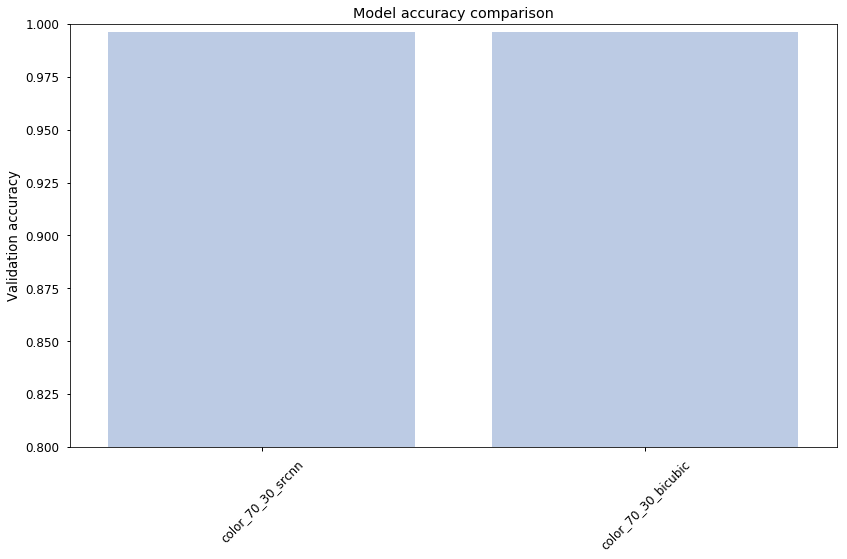

In [5]:
files = [f for f in os.listdir(MODEL_DIR) if ".csv" in f]

i = 0
for f in files:
    df = pd.read_csv(MODEL_DIR + f)
    df['model'] = f.replace(".csv", "")
    df['image_type'] = f.replace(".csv", "")[10:-6]
    df['train_split'] = f.replace(".csv", "")[-5:]
    if i == 0:
        model_results = df
    else:
        model_results = model_results.append(df)   
    i += 1

best_val_acc = {}
for m in set(model_results.model):
    df = model_results.loc[model_results.model == m,]
    val = np.max(df.val_acc)
    best_val_acc[m[10:]] = val

df = pd.DataFrame.from_dict(best_val_acc, orient='index').reset_index()
df.columns = ["model", "val_acc"]
df.sort_values(by="val_acc", inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x="model", y="val_acc", data=df, color=vc_color);
plt.title("Model accuracy comparison")
plt.ylabel("Validation accuracy")
plt.xlabel("")
plt.xticks(rotation = 45);
plt.ylim((0.8, 1));
plt.tight_layout();
#plt.savefig("./images/model_comparison.jpg")

### Training / test splits

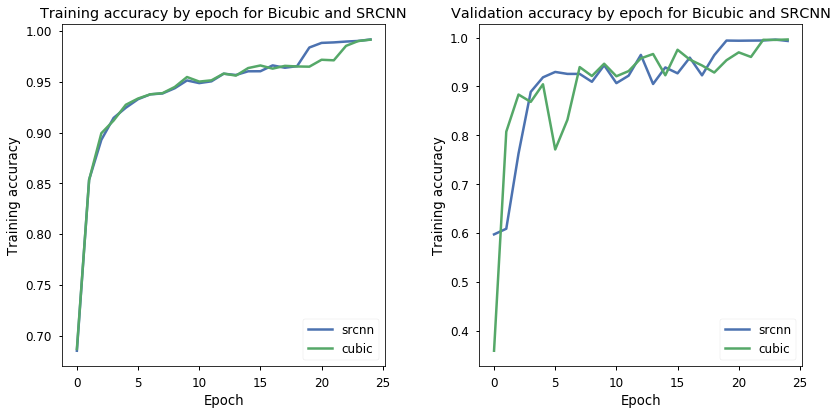

In [17]:
fix, ax = plt.subplots(1, 2, figsize=(12, 6))

df = model_results
for s in set(df.train_split):
    dfp = df.loc[df.train_split == s, :]
    
    ax[0].plot(dfp.epoch, dfp.acc, linewidth=2.5);
    ax[0].legend(set(df.train_split), loc=4);
    ax[0].set_xlabel("Epoch");
    ax[0].set_ylabel("Training accuracy");
    ax[0].set_title("Training accuracy by epoch for Bicubic and SRCNN");
    
    ax[1].plot(dfp.epoch, dfp.val_acc, linewidth=2.5);
    ax[1].legend(set(df.train_split), loc=4);
    ax[1].set_xlabel("Epoch");
    ax[1].set_ylabel("Training accuracy");
    ax[1].set_title("Validation accuracy by epoch for Bicubic and SRCNN"); 
    
    
plt.tight_layout()
plt.savefig("./images/srcnn_training_acc_epoch.png")

### SRCNN model structure

In [18]:
# Load model
model = load_model(MODEL_DIR + "SRCNN_PV.hdf5")

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 33, 33, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        15616     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 3)         2403      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________
